# Honda Cars Sales in India 2005-2022

Dataset link: https://www.kaggle.com/datasets/themrityunjaypathak/honda-car-selling

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
cars = pd.read_csv("honda_car_selling.csv")
cars = cars.drop(cars[
    (cars["Year"] <= 2004)
    |
    (cars["Year"] > 2022)
    ].index)
cars

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model
0,2019,19006 kms,Petrol,Automatic,9.29 Lakh,Honda City V CVT
1,2021,11936 kms,Petrol,Automatic,13.95 Lakh,Honda City ZX CVT
2,2018,29635 kms,Petrol,Automatic,9.95 Lakh,Honda City i-VTEC CVT ZX
3,2020,16163 kms,Petrol,Automatic,13.26 Lakh,Honda City ZX CVT
4,2015,105114 kms,Petrol,Manual,5.68 Lakh,Honda City i VTEC V
...,...,...,...,...,...,...
994,2007,90000 kms,Petrol,Manual,1.22 Lakh,Honda Civic 1.8 V MT
995,2016,31500 kms,Petrol,Manual,4.25 Lakh,Honda Amaze S i-VTEC
996,2017,39735 kms,Petrol,Manual,5.10 Lakh,Honda Amaze S Petrol
997,2017,36000 kms,Petrol,Manual,6.10 Lakh,Honda City i VTEC S


## Car Sales By Year

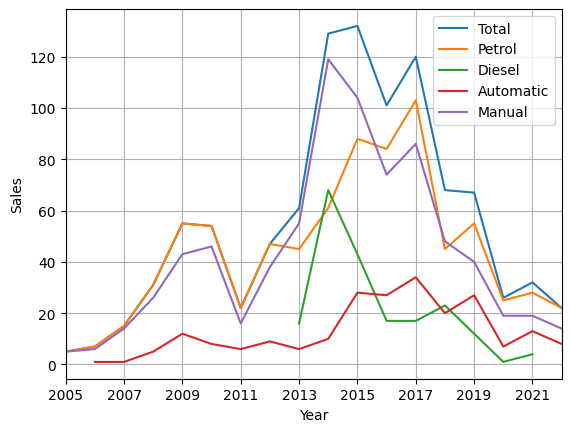

In [165]:
YEAR_STEP_COUNT = 2

sales_all = cars.groupby("Year").count().Price

#########################################################
# By Fuel Type
fuel_type = cars.groupby("Fuel Type")
petrol = fuel_type.get_group(' Petrol ')
diesel = fuel_type.get_group(' Diesel ')

sales_petrol = petrol.groupby("Year").count().Price
sales_diesel = diesel.groupby("Year").count().Price

#########################################################
# By Transmission Type
transmission_type = cars.groupby("Suspension")
automatic = transmission_type.get_group(' Automatic')
manual = transmission_type.get_group(' Manual')

sales_automatic = automatic.groupby("Year").count().Price
sales_manual = manual.groupby("Year").count().Price

#########################################################

# sales_all.plot()
# sales_petrol.plot()
# sales_diesel.plot()
# sales_automatic.plot()
# sales_manual.plot()

plt.plot(sales_all, label="Total")
plt.plot(sales_petrol, label="Petrol")
plt.plot(sales_diesel, label="Diesel")
plt.plot(sales_automatic, label="Automatic")
plt.plot(sales_manual, label="Manual")

plt.xlabel("Year")
plt.ylabel("Sales")

plt.axis([cars.Year.min(), cars.Year.max(), None, None]) # [x_min, x_max, y_min, y_max]
plt.xticks(np.arange(cars.Year.min(), cars.Year.max() + 1, YEAR_STEP_COUNT)) # equivalent to range(low, high + 1, 2)

plt.legend()
plt.grid()
plt.show()

### Cars By Fuel Type

Fuel Type
 CNG          1
 Diesel     201
 Petrol     792
Name: Fuel Type, dtype: int64


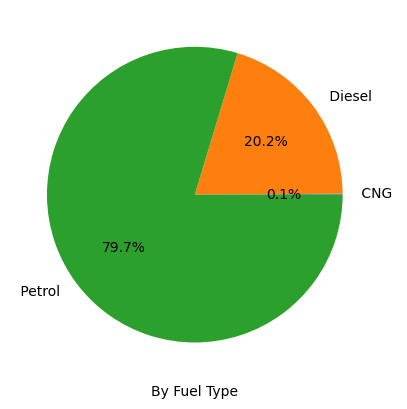

In [8]:
data = fuel_type.count().Year
print(pd.Series(data, name="Fuel Type"))

data.plot.pie(autopct='%1.1f%%')
plt.xlabel("By Fuel Type")
plt.ylabel("")
plt.show()


### Cars By Transmission Type

Suspension
 Automatic    222
 Manual       772
Name: Transmission Type, dtype: int64


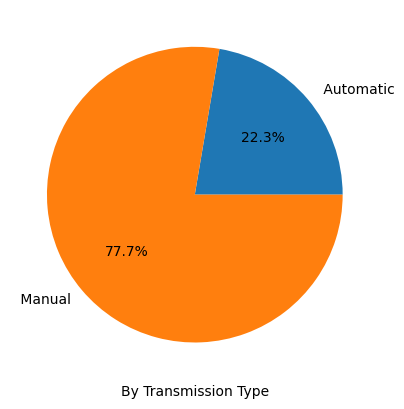

In [9]:
data = transmission_type.count().Year
print(pd.Series(data, name="Transmission Type"))

data.plot.pie(autopct='%1.1f%%')
plt.xlabel("By Transmission Type")
plt.ylabel("")
plt.show()

### Cars By Model: Petrol and Diesel

Because there are around 180 car models, in order to get a better picture, we shall take only the first two words in the model name, reducing the data to 10 major models.

We will then group them by fuel type and then plot the bar graph.

In [38]:
cars_model_stripped_petrol = cars_model_stripped[cars_model_stripped["Fuel Type"] == " Petrol "]

cars_model_stripped_diesel = cars_model_stripped[cars_model_stripped["Fuel Type"] == " Diesel "]

car_model_grp = cars_model_stripped_petrol.groupby("Car Model")
data_petrol = car_model_grp.count().Year

car_model_grp = cars_model_stripped_diesel.groupby("Car Model")
data_diesel = car_model_grp.count().Year

# data_petrol.plot.bar(color="green", stacked=False)
# data_diesel.plot.bar(color="red", stacked=False)

# plt.xlabel("By Car Model")
# plt.ylabel("")
# plt.show()

Car Model
Honda Accord      14
Honda Amaze      141
Honda BR-V        15
Honda Brio        57
Honda CR-V        17
Honda City       400
Honda Civic       39
Honda Jazz        80
Honda Mobilio      6
Honda WR-V        23
Name: Year, dtype: int64

In [30]:
cars_model_petrol_and_diesel = pd.merge(data_petrol, data_diesel, on="Car Model")
cars_model_petrol_and_diesel.rename({"Year_x": "Petrol", "Year_y":"Diesel"}, axis=1, inplace=True)
cars_model_petrol_and_diesel

,Petrol,Diesel
Car Model,,
Honda Amaze,141,74
Honda BR-V,15,7
Honda CR-V,17,1
Honda City,400,73
Honda Civic,39,1
Honda Jazz,80,12
Honda Mobilio,6,13
Honda WR-V,23,20


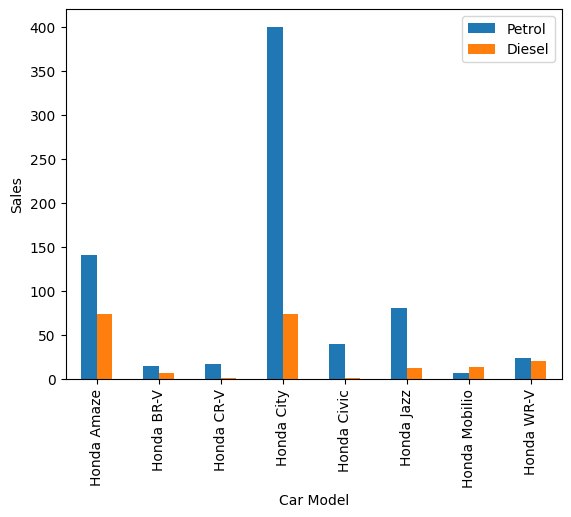

In [32]:
# fig, ax = plt.subplots()
# cars_model_petrol_and_diesel.plot.bar(ax=ax)
# ax.legend(["Petrol", "Diesel"]);

cars_model_petrol_and_diesel.plot.bar()
plt.ylabel("Sales")
plt.show()

### TODO

- group by year & price
    - average line graph
    - max line graph
    - overlay, petrol and diesel and transmission type on above, keep only meaningful ones

- group by year and kms driven
    - same as price
    
- price vs kms driven
    - does more price cause people to use vehicles less?
    - linear regression
    - overlay, petrol and diesel and transmission type on above, keep only meaningful ones

### Kilometres Driven vs Price

In [363]:
cars = pd.read_csv("honda_car_selling.csv")
cars = cars.drop(cars[
    (cars["Year"] <= 2004)
    |
    (cars["Year"] > 2022)
    ].index)
kms_vs_price = cars[["kms Driven", "Price"]]
kms_vs_price["kms Driven"] = kms_vs_price["kms Driven"].apply(lambda x: x.split()[0])
kms_vs_price.Price = kms_vs_price.Price.apply(lambda x: x.split()[0])
# kms_vs_price.set_index("Price", inplace=True)

# kms_vs_price.replace()

# plt.plot(kms_vs_price.Price)
# kms_vs_price.iloc[:,:]

# kms_vs_price.iloc[598, 0] = .8
kms_vs_price = kms_vs_price.sort_values("Price")
kms_vs_price.Price.apply(lambda x: float(x.replace(",","")))
kms_vs_price["kms Driven"].apply(lambda x: float(x))
new = kms_vs_price.iloc[:-3, :]

new = new.set_index("Price")
new

/tmp/ipykernel_42499/2413354215.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kms_vs_price["kms Driven"] = kms_vs_price["kms Driven"].apply(lambda x: x.split()[0])
/tmp/ipykernel_42499/2413354215.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kms_vs_price.Price = kms_vs_price.Price.apply(lambda x: x.split()[0])


,kms Driven
Price,
1,223000
1,114502
1,87163
1,78216
1.10,110000
...,...
9.75,63121
9.75,6000
9.90,54000


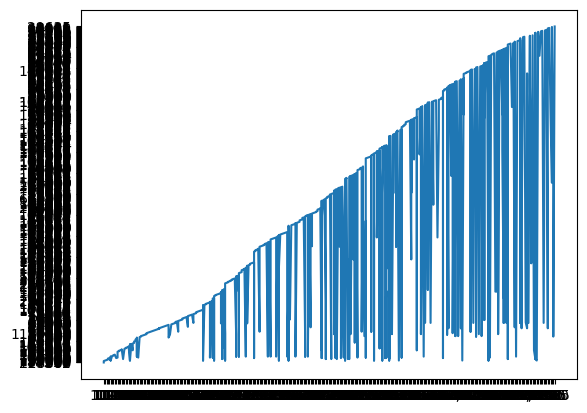

In [367]:
# new.values.toist()

a = new.index.tolist()
b = [x[0] for x in new.values.tolist()]

plt.plot(a, b)
plt.show()


### Cars By Price

In [124]:
cars = pd.read_csv("honda_car_selling.csv")
cars = cars.drop(cars[
    (cars["Year"] <= 2004)
    |
    (cars["Year"] > 2022)
    ].index)
cars

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model
0,2019,19006 kms,Petrol,Automatic,9.29 Lakh,Honda City V CVT
1,2021,11936 kms,Petrol,Automatic,13.95 Lakh,Honda City ZX CVT
2,2018,29635 kms,Petrol,Automatic,9.95 Lakh,Honda City i-VTEC CVT ZX
3,2020,16163 kms,Petrol,Automatic,13.26 Lakh,Honda City ZX CVT
4,2015,105114 kms,Petrol,Manual,5.68 Lakh,Honda City i VTEC V
...,...,...,...,...,...,...
994,2007,90000 kms,Petrol,Manual,1.22 Lakh,Honda Civic 1.8 V MT
995,2016,31500 kms,Petrol,Manual,4.25 Lakh,Honda Amaze S i-VTEC
996,2017,39735 kms,Petrol,Manual,5.10 Lakh,Honda Amaze S Petrol
997,2017,36000 kms,Petrol,Manual,6.10 Lakh,Honda City i VTEC S


In [106]:
cars_price = cars
cars_price.Price = cars_price.Price.apply(lambda x: x.split()[0])
cars_price
# sales_all = cars_price.groupby("Year").mean()
# sales_all

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model
0,2019,19006 kms,Petrol,Automatic,9.29,Honda City V CVT
1,2021,11936 kms,Petrol,Automatic,13.95,Honda City ZX CVT
2,2018,29635 kms,Petrol,Automatic,9.95,Honda City i-VTEC CVT ZX
3,2020,16163 kms,Petrol,Automatic,13.26,Honda City ZX CVT
4,2015,105114 kms,Petrol,Manual,5.68,Honda City i VTEC V
...,...,...,...,...,...,...
994,2007,90000 kms,Petrol,Manual,1.22,Honda Civic 1.8 V MT
995,2016,31500 kms,Petrol,Manual,4.25,Honda Amaze S i-VTEC
996,2017,39735 kms,Petrol,Manual,5.10,Honda Amaze S Petrol
997,2017,36000 kms,Petrol,Manual,6.10,Honda City i VTEC S


## The end

The stuff below is redundant

### Cars By Model: All Model Names

In [120]:
cars = pd.read_csv("honda_car_selling.csv")
cars = cars.drop(cars[
    (cars["Year"] <= 2004)
    |
    (cars["Year"] > 2022)
    ].index)
cars

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model
0,2019,19006 kms,Petrol,Automatic,9.29 Lakh,Honda City V CVT
1,2021,11936 kms,Petrol,Automatic,13.95 Lakh,Honda City ZX CVT
2,2018,29635 kms,Petrol,Automatic,9.95 Lakh,Honda City i-VTEC CVT ZX
3,2020,16163 kms,Petrol,Automatic,13.26 Lakh,Honda City ZX CVT
4,2015,105114 kms,Petrol,Manual,5.68 Lakh,Honda City i VTEC V
...,...,...,...,...,...,...
994,2007,90000 kms,Petrol,Manual,1.22 Lakh,Honda Civic 1.8 V MT
995,2016,31500 kms,Petrol,Manual,4.25 Lakh,Honda Amaze S i-VTEC
996,2017,39735 kms,Petrol,Manual,5.10 Lakh,Honda Amaze S Petrol
997,2017,36000 kms,Petrol,Manual,6.10 Lakh,Honda City i VTEC S


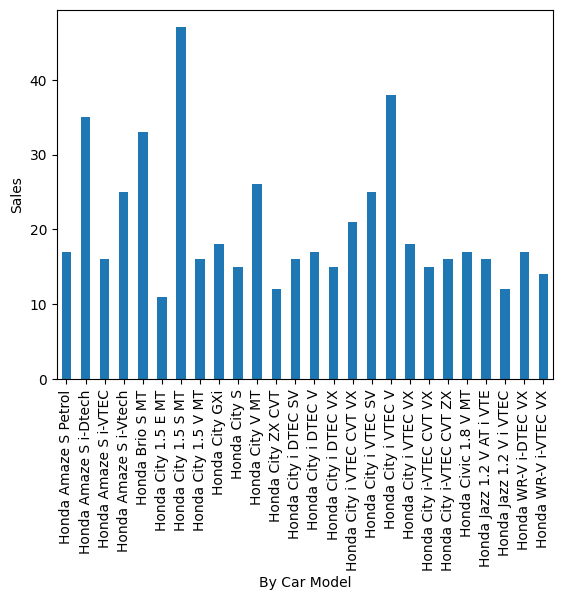

In [121]:
HIDE_BELOW = 10

car_model_grp = cars.groupby("Car Model")
data = car_model_grp.count().Year
data = data[data > HIDE_BELOW]
data_hidden = data[data <= HIDE_BELOW]
# print(pd.Series(data, name="Car Model"))

# data.plot.pie(autopct='%1.1f%%')

data.plot.bar()
plt.xlabel("By Car Model")
plt.ylabel("Sales")
plt.show()

In [122]:
len(car_model_grp) # 180 before

180

### Cars By Model

Because there are around 180 car models, in order to get a better picture, we shall take only the first two words in the model name, reducing the data to 10 major models.

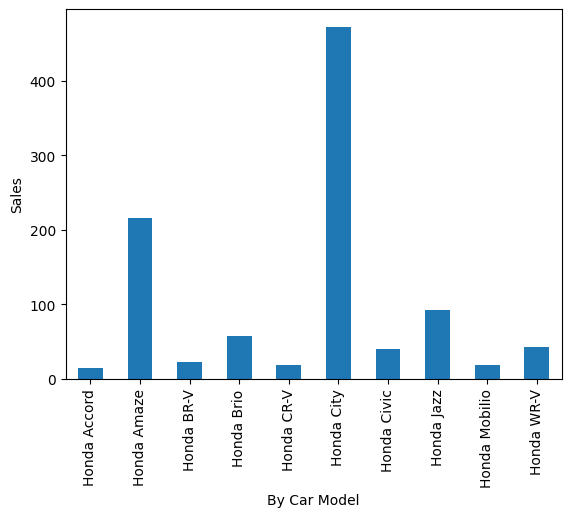

In [123]:
cars = pd.read_csv("honda_car_selling.csv")
cars = cars.drop(cars[
    (cars["Year"] <= 2004)
    |
    (cars["Year"] > 2022)
    ].index)
cars["Car Model"] = cars["Car Model"].apply(lambda x: ' '.join(x.split()[:2]))
cars_model_stripped = cars
cars_model_stripped

car_model_grp = cars_model_stripped.groupby("Car Model")
data = car_model_grp.count().Year

data.plot.bar()
plt.xlabel("By Car Model")
plt.ylabel("Sales")
plt.show()# price line graph, orice by model, by petrol